In [2]:
import sys
sys.path.append("../code/")

import matplotlib.pyplot as plt
import numpy as np

from dataset import ContrailsPretrainingDataset
from utils import data_split, normalize_min_max, load_synthetic_metadata

df = data_split("../data/data_split.csv")
df_train = df[df.fold != 0]
df_valid = df[df.fold == 0]

df_synthetic_train = load_synthetic_metadata()
df_synthetic_train = df_synthetic_train[df_synthetic_train.fold == 0]

train_dataset = ContrailsPretrainingDataset(df_train, df_synthetic_train, "../data/pseudo-labels/predictions/", 8, 384, split="train")

In [18]:
i = np.random.choice(len(train_dataset))
print(i)
sample = train_dataset[i]

9145


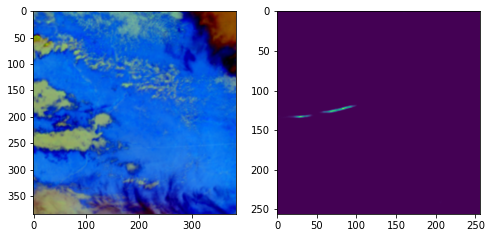

In [19]:
from einops import rearrange

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(normalize_min_max(rearrange(sample["image"], "c h w -> h w c")))
axs[1].imshow(sample["mask"][0])

In [2]:
import numpy as np
import os

len(np.unique(os.listdir("../data/pseudo-labels/predictions/")))

20529